# Inferencia Bayesiana Entrega 1: Maitas Moran LU 806/19

## Guia 1 - Ejercicio 9
El jugador Montiel convirtio los 12 penales que pateo al dia de la fecha en su carrera profesional

a) Usando un prior beta de la probabilidad que tiene Montiel de convertir un penal, es decir $\theta \sim \Beta(alpha, beta)$ encontrar la distribución posterior para $\theta$ y graficarla (definir a gusto los parámetros alpha y beta de la distribución).

b) ¿Cuál es la probabilidad de que convierta el penal número 13? ¿Cómo se compara con la
estimación frecuentista?

c) ¿Qué supuestos estamos haciendo sobre el proceso que generó los datos?

d) Haciendo simulaciones, crear un histograma de la distribución predicha de penales convertidos
en los próximos 10 penales que ejecute Montiel (posterior predictive distribution).

e) Estimar la probabilidad de que Montiel meta al menos 8 de los próximos 10 penales que patee.

### Setup

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import curve_fit

### a) Usando un prior beta de la probabilidad que tiene Montiel de convertir un penal, es decir $\theta \sim \Beta(alpha, beta)$ encontrar la distribución posterior para $\theta$ y graficarla (definir a gusto los parámetros alpha y beta de la distribución).


Para este ejericio vamos a usar 3 Priors para ver si contienen diferencias significatibas entre si y que resultados obtenemos de cada uno.

- El primer Prior "Naive" Usamos como Prior $\Beta(13, 4)$ porque nos parece una distribucion que modela bien la probabilidad de que un jugador convierta un penal en base a la intuicion de saber que es mas probable que un penal termine en gol contrario a que no lo haga

- El segundo Prior va a ser una distribucion Beta en base a los datos historicos de penales de los 26 jugadores campeones del mundo en Qatar 2022 :argentina:

- El tercer Prior va a ser una distribucion Beta en base a los datos historicos de penales de los 1599 jugadores registrados en las ligas europeas (LaLiga, Bundesliga, Serie A y Premier League) scrapeados de la pagina https://www.transfermarkt.com

Para cada uno de estos prior queremos encontrar la distribucion posterior para $\theta$

Primero calculamos la Likehood de ver los datos de montiel asumiendo que cada penal se comporta como un experimento de bernoulli con probabilidad $\theta$, es decir que cada penal tiene la misma probabilidad de terminar en gol y que es independiente del penal anterior (esto es un modelo simplista ya que implica que no depende del arquero, del contexto del partido, de lesiones de jugadores, etc)

- $\theta \sim  \Beta(\alpha_{0}, \beta_{0})$

- $L(\theta | datosMontiel) = P(12/12 | \theta) = \theta^{12}$
- $Prior(\theta) \propto \theta^{\alpha_{0} - 1} \cdot (1 - \theta)^{\beta_{0} - 1}$ 



Podemos calcular la *Post* para cada *Prior* como:

- $Post(\theta | datosMontiel) \propto  L(\theta | datosMontiel) \cdot p(\theta)$

- $Post(\theta | datosMontiel) \propto \theta^{12} \cdot \theta^{\alpha_{0} - 1} \cdot (1 - \theta)^{\beta_{0} - 1}$

- $Post(\theta | datosMontiel) \propto \theta^{\alpha_{0} + 11} \cdot (1 - \theta)^{\beta_{0} - 1}$

- $Post(\theta | datosMontiel) \sim Beta(\alpha_{0} + 12, \beta_{0}) $



In [105]:
montiel_penalty_goals = 12
montiel_penalty_misses = 0

# Prior naive
naive_prior_alpha = 13
naive_prior_beta = 4

naive_post_alpha = naive_prior_alpha + montiel_penalty_goals
naive_post_beta = naive_prior_beta + montiel_penalty_misses

In [106]:
#Scrapeamos manualmente la base de trasnfermarkt para obtener la info
df_arg = pd.DataFrame({"Player":[], "Goals":[], "Misses":[]})

df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["FrancoArmani"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/119634
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["GeronimoRulli"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/229604
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["EmilianoMartinez"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/111873
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["JuanFoyth"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/480763
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["NicolasTagliafico"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/131225
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["GonzaloMontiel"], "Goals":[5], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/402733
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["GermanPezzella"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/113133
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["MarcosAcuña"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/60410
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["CristianRomero"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/355915
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["NicolásOtamendi"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/54781
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["LisandroMartínez"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/480762
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["NahuelMolina"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/424042
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["LeandroParedes"], "Goals":[9], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/166237
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["RodrigodePaul"], "Goals":[10], "Misses":[3]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/255901
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["ExequielPalacios"], "Goals":[6], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/401578
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["AlejandroGómez"], "Goals":[6], "Misses":[4]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/20005
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["GuidoRodriguez"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/342385
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["AlexisMacAllister"], "Goals":[12], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/534033
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["EnzoFernandez"], "Goals":[6], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/648195
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["JuliánÁlvarez"], "Goals":[7], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/576024
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["LionelMessi"], "Goals":[110], "Misses":[31]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/28003
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["AngelDiMaría"], "Goals":[11], "Misses":[5]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/45320
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["ÁngelCorrea"], "Goals":[1], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/266807
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["ThiagoAlmada"], "Goals":[13], "Misses":[6]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/576028
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["PauloDybala"], "Goals":[39], "Misses":[5]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/206050
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["LautaroMartínez"], "Goals":[16], "Misses":[8]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/406625

#Para la simplicidad del analisis vamos a filtrar todos los jugadores que no patearon penales, aunque estaria bueno ver que tanto empeora en el resultado final
df_arg = df_arg[(df_arg.Goals != 0) | (df_arg.Misses != 0)]
df_arg['GoalRatio'] = df_arg['Goals'] / (df_arg['Goals'] + df_arg['Misses'])
df_arg

,Player,Goals,Misses,GoalRatio
5,GonzaloMontiel,5.0,0.0,1.000000
12,LeandroParedes,9.0,1.0,0.900000
13,RodrigodePaul,10.0,3.0,0.769231
14,ExequielPalacios,6.0,0.0,1.000000
15,AlejandroGómez,6.0,4.0,0.600000
17,AlexisMacAllister,12.0,1.0,0.923077
18,EnzoFernandez,6.0,1.0,0.857143
19,JuliánÁlvarez,7.0,1.0,0.875000
20,LionelMessi,110.0,31.0,0.780142
21,AngelDiMaría,11.0,5.0,0.687500


Best-fit parameters: a = 0.96, b = 0.47


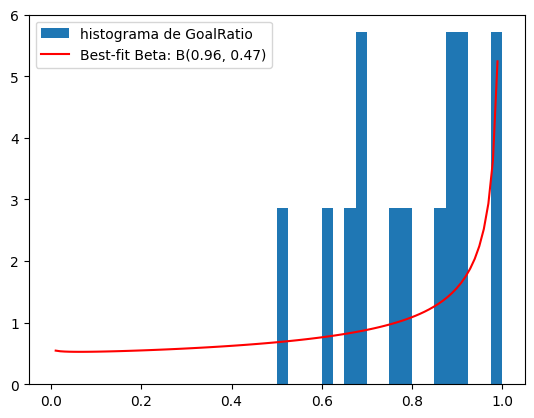

In [108]:


hist, bin_edges = np.histogram(df_arg['GoalRatio'], bins=np.unique(df_arg['GoalRatio']))
alpha_0, beta_0 = fit_beta_distribution(bin_edges[:-1], hist)

x = np.linspace(0, 1, 100)
y = beta_pdf(x, alpha_0, beta_0)
plt.hist(df_arg['GoalRatio'], label='histograma de GoalRatio', bins=20, density=True)
plt.plot(x, y, 'r-', label='Best-fit Beta: B({:.2f}, {:.2f})'.format(alpha_0, beta_0))
plt.legend()
plt.xlim(-0.05, 1.05)
plt.show()

In [109]:
#Scrapeamos manualmente la base de trasnfermarkt para obtener la info
df_europe = pd.read_csv('players_penalties.csv')

print('Number of players in the dataset:', len(df_europe))
df_europe

Number of players in the dataset: 1559


,Name,Goals,Misses
0,ScottTwine,1,1
1,JuniorAjayi,0,0
2,BeñatTurrientes,0,0
3,AndrewMoran,0,1
4,ChrisRamos,0,0
...,...,...,...
1554,Juanmi,0,0
1555,IñigoRuiz de Galarreta,0,0
1556,CédricBakambu,17,1
1557,AbdoulayeDoucouré,1,0


In [110]:
# Para la simplicidad del analisis vamos a filtrar todos los jugadores con menos de 10 penales pateados.
# aunque estaria bueno ver que tanto empeora en el resultado final

df_europe = df_europe[(df_europe["Goals"] + df_europe["Misses"]) > 10]
df_europe['GoalRatio'] = df_europe['Goals'] / (df_europe['Goals'] + df_europe['Misses'])
df_europe

/tmp/ipykernel_760087/3358776130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe['GoalRatio'] = df_europe['Goals'] / (df_europe['Goals'] + df_europe['Misses'])


,Name,Goals,Misses,GoalRatio
5,ÁlvaroMorata,14,4,0.777778
16,Jordan,10,3,0.769231
17,NikolaVlašić,9,5,0.642857
18,JamesMilner,30,5,0.857143
20,RomanYaremchuk,6,5,0.545455
...,...,...,...,...
1546,NealMaupay,12,3,0.800000
1550,LukeBerry,9,4,0.692308
1551,AntoineGriezmann,24,13,0.648649
1552,HakanÇalhanoğlu,41,4,0.911111


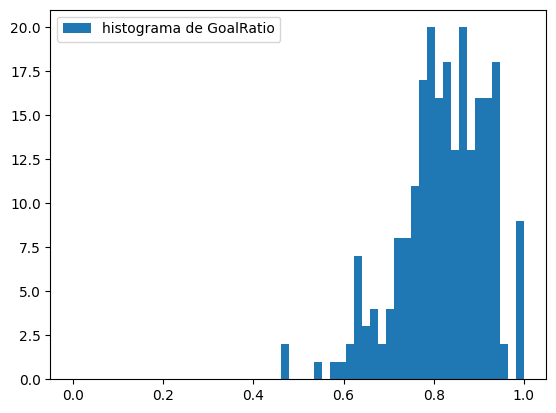

In [111]:
plt.plot()
plt.hist(df_europe['GoalRatio'], label='histograma de GoalRatio', bins=30)
plt.legend()
plt.xlim(-0.05, 1.05)
plt.show()

Best-fit parameters: a = 4.45, b = 1.36


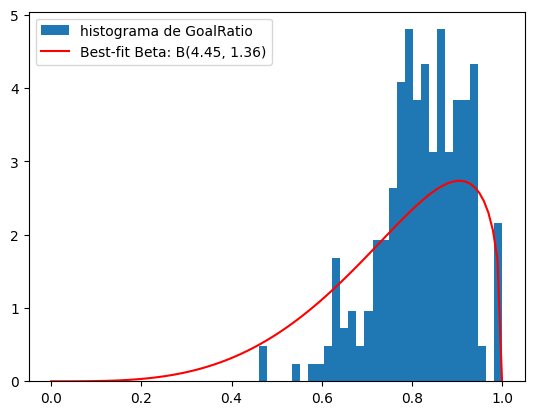

In [112]:

def beta_pdf(x, a, b):
    return beta.pdf(x, a, b)

def fit_beta_distribution(x, y):
    popt, pcov = curve_fit(beta_pdf, x, y)
    return popt[0], popt[1]


hist, bin_edges = np.histogram(df_europe['GoalRatio'], bins=np.unique(df_europe['GoalRatio']))
alpha_0, beta_0 = fit_beta_distribution(bin_edges[:-1], hist)

x = np.linspace(0, 1, 100)
y = beta_pdf(x, alpha_0, beta_0)
plt.hist(df_europe['GoalRatio'], label='histograma de GoalRatio', bins=30, density=True)
plt.plot(x, y, 'r-', label='Best-fit Beta: B({:.2f}, {:.2f})'.format(alpha_0, beta_0))
plt.legend()
plt.xlim(-0.05, 1.05)
plt.show()

In [113]:
# Prior Campeones del mundo
df_arg = pd.DataFrame({"Player":[], "Goals":[], "Misses":[], "GoalRatio":[]})

df_arg = df_arg.append({"Player":"FrancoArmani", "Goals":0, "Misses":0, "GoalRatio":0}, ignore_index=True)

naive_prior_alpha = 13
naive_prior_beta = 4

naive_post_alpha = naive_prior_alpha + montiel_penalty_goals
naive_post_alpha = naive_prior_beta + montiel_penalty_misses

AttributeError: 'DataFrame' object has no attribute 'append'

### b) ¿Cual es la probabilidad de que convierta el penal número 13? ¿Cómo se compara con la estimación frecuentista?

Vamos a buscar la probabilidad de que Montiel convierta el penal numero 13.

Promedio 0.9260518111532569
Esperanza 0.9285714285714286


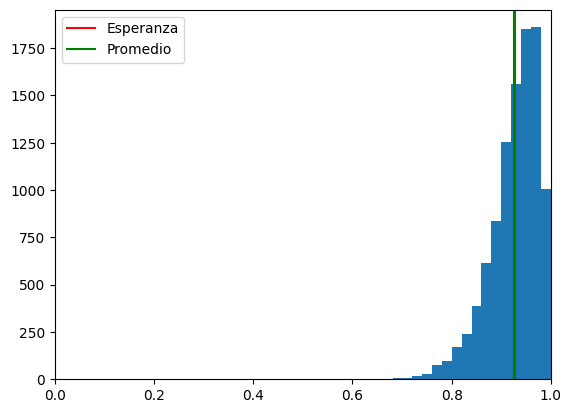

In [ ]:
# Generamos unos titas randoms.
# A partir de esos titas simulamos la cantidad de goles hechos.
# Estos goles los guardamos en "tiros".
tiros = np.array([])
for i in range(1,10000):
    tita = np.random.beta(25, 2)
    tiros = np.append(tiros, tita)


# Calculamos la mediana y el promedio de "tiros" 
mean= np.mean(tiros)
print("Promedio", mean)
print("Esperanza", 13 / (13+1))     # E = alpha / alpha + beta 
fig, ax = plt.subplots(1)
ax.hist(tiros, bins = 20)
ax.set_xlim(0,1)
ax.axvline(13 / (13+1), color ="red", label = "Esperanza")
ax.axvline(mean, color = "green", linestyle = "-", label = "Promedio")
ax.legend()
plt.show()

- Segun los Bayesianos, tenemos un 92.6% de probabilidades de ver a Montiel meter el 13vo tiro.

- Mientras que los frecuentistas dirian que es el 100%.

### c)  ¿Qué supuestos estamos haciendo sobre el proceso que generó los datos?

- Estamos tomando por sentado muchas cosas que deberian influir en su precision, (arquero, pelota, etc).
- Estamos asumiendo que nadie mete el 100% de los tiros.


### d)  Haciendo simulaciones, crear un histograma de la distribución predicha de penales convertidos en los próximos 10 penales que ejecute Montiel (posterior predictive distribution).

Nuestor array de tiros metidos: [10. 10. 10. ... 10. 10. 10.]
Promedio predicho: 9.251325132513252


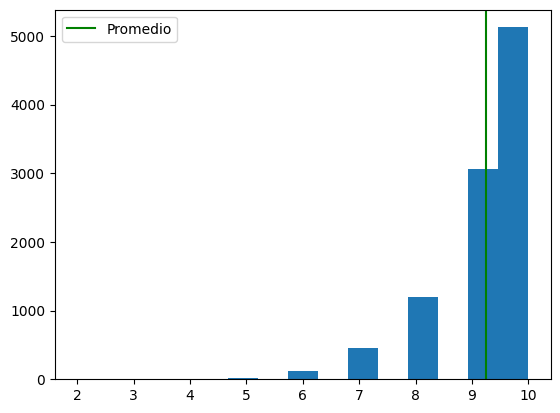

In [ ]:
# Vamos a simular este experimento 10mil veces:
tiros_predichos = np.array([])
for i in range(1,10000):
    # Generamos aleatoriamente nuestro tita.
    tita = np.random.beta(25, 2)

    # Generamos aleatoriamente cuantos goles metió de los 10 tiros.
    goles = np.random.binomial(10, tita)

    # Guardamos los tiros en un array
    tiros_predichos = np.append(tiros_predichos, goles)
print("Nuestor array de tiros metidos:", tiros_predichos)

mean= np.mean(tiros_predichos)
print("Promedio predicho:", mean)
fig, ax = plt.subplots(1)
ax.hist(tiros_predichos, bins = 15)
ax.axvline(mean, color = "green", label = "Promedio")
ax.legend()
plt.show()

### e) Estimar la probabilidad de que Montiel meta al menos 8 de los próximos 10 penales que patee.

Teniendo el Histograma anterior, podriamos simplemente sumar los casos en que Montiel haya metido 8, 9 y 10 penales y dividirlos por la cantidad total de intentos. 

In [ ]:
# Filtramos los casos en que Montiel haya metido >= 8 goles
tiros_predichos_filtrados = [tiro for tiro in tiros_predichos if tiro >= 8]

# Calculamos el promedio frecuentista de que meta >= 8 goles.
len(tiros_predichos_filtrados) / len(tiros_predichos)

0.9395939593959396